In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd

In [7]:
files = ["A3.wav", "Bb5.wav", "E3.wav", "E4.wav", "G2.wav"]

In [35]:
def get_dft(x):
    """
    Return the non-redundant real/imaginary components
    of the DFT, expressed as amplitudes of sines/cosines
    involved
    
    Parameters
    ----------
    x: ndarray(N)
        A signal
    
    Returns
    -------
    cos_sum: ndarray(ceil(N/2)), sin_sums(ndarray(ceil(N/2)))
        DFT cosine/sine amplitudes
    """
    N = len(x)
    t = np.linspace(0, 1, N+1)[0:N]
    n_freqs = int(np.ceil(N/2))
    f = np.fft.fft(x) # O(N log N) time
    cos_sums = np.real(f)[0:n_freqs]/(N/2)
    sin_sums = -np.imag(f)[0:n_freqs]/(N/2)
    return cos_sums, sin_sums



max: 1509
hertz: 423.36942691368074


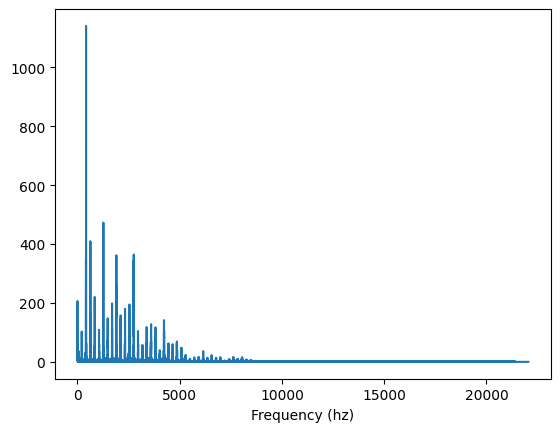

In [51]:
for file in ["A3.wav"]:
    N = 100
    sr, x = wavfile.read(file)
    c, s = get_dft(x)
    amps = np.sqrt(c**2 + s**2)
    
    N = len(x)
    idx = np.argmax(amps)
    #hz = idx * (sr/N)
    print("max: {}".format(idx))
    f = idx * (sr/N)
    print("hertz: {}".format(f))
    
    plt.figure()
    plt.plot(np.arange(len(amps))*sr/N, amps)
    plt.xlabel("Frequency (hz)")
    #plt.ylabel("amps")

len(x) 157184
423.3694269136808


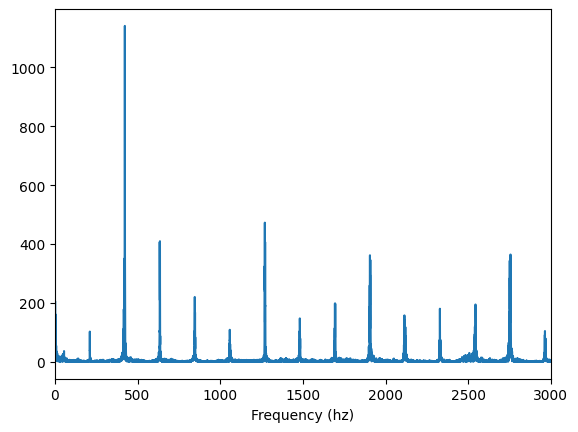

In [47]:
print("len(x)", len(x))
c, s = get_dft(x)
amps = np.sqrt(c**2 + s**2)

N = len(x)
idx = np.argmax(amps)
f = idx*sr/N # Convert into cycles/second
print(f)

plt.figure()
plt.plot(np.arange(len(amps))*sr/N, amps)
plt.xlim([0, 3000])
#plt.xlabel("cycles per {} samples".format(len(x)))
plt.xlabel("Frequency (hz)")

t = np.arange(sr)/sr
y = np.cos(2*np.pi*f*t)
#ipd.Audio(y, rate=sr)

# Chrip

In [53]:
sr = 44100
t = np.arange(3*sr)/sr
y = np.cos(2*np.pi*220*t**2)
ipd.Audio(y, rate=sr)